# 深度學習_女裝配件辨識
Tensorflow官網提供程式碼與資料集   
[資料集](https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a)  
[作法參考](https://ithelp.ithome.com.tw/articles/10233758)

資料集類別描述:  
0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot

## 一、載入資料並分割

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

#載入資料集mnist，並執行切割
ds = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train),(x_test, y_test) = ds
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

X訓練資料 -> 6萬筆圖片(28*28pix)， y訓練資料 -> 6萬筆答案

X測試資料 -> 1萬筆圖片(28*28pix)， y測試資料 -> 1萬筆答案

訓練資料第2筆，標記為-T袖/上衣(0)-


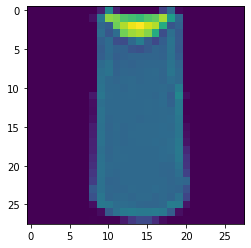

In [2]:
# Define the text labels
fashion_mnist_labels = ["T袖/上衣",   # index 0
                        "長褲",       # index 1
                        "套頭衫",     # index 2 
                        "洋裝",       # index 3 
                        "外套",       # index 4
                        "涼鞋",       # index 5
                        "襯衫",       # index 6 
                        "運動鞋",     # index 7 
                        "皮包",       # index 8 
                        "短靴"]       # index 9
img_index = 2
lab_index = y_train[img_index]
print(f'訓練資料第{img_index}筆，標記為-{fashion_mnist_labels[lab_index]}({lab_index})-')
plt.imshow(x_train[img_index])

In [3]:
# 顯示前10筆y_train
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

## 二、特徵工程

In [4]:
#特徵工程: (X-min)/(255-0)常態化
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 顯示第一筆資料
# x_train_norm[0]

## 三、訓練模型

In [5]:
#套入模型: Deep Learning
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])

In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) #隨機梯度下降，註解3
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


   1/1500 [..............................] - ETA: 0s - loss: 2.5227 - accuracy: 0.1562

  87/1500 [>.............................] - ETA: 0s - loss: 1.1348 - accuracy: 0.6031

 175/1500 [==>...........................] - ETA: 0s - loss: 0.9561 - accuracy: 0.6677

 264/1500 [====>.........................] - ETA: 0s - loss: 0.8513 - accuracy: 0.7045

 350/1500 [======>.......................] - ETA: 0s - loss: 0.8037 - accuracy: 0.7206

 433/1500 [=======>......................] - ETA: 0s - loss: 0.7628 - accuracy: 0.7338



 520/1500 [=========>....................] - ETA: 0s - loss: 0.7344 - accuracy: 0.7430

 607/1500 [===========>..................] - ETA: 0s - loss: 0.7096 - accuracy: 0.7515

 691/1500 [============>.................] - ETA: 0s - loss: 0.6938 - accuracy: 0.7557

 778/1500 [==============>...............] - ETA: 0s - loss: 0.6780 - accuracy: 0.7614



 865/1500 [================>.............] - ETA: 0s - loss: 0.6610 - accuracy: 0.7678

 953/1500 [==================>...........] - ETA: 0s - loss: 0.6479 - accuracy: 0.7714

1040/1500 [===================>..........] - ETA: 0s - loss: 0.6359 - accuracy: 0.7748

1129/1500 [=====================>........] - ETA: 0s - loss: 0.6258 - accuracy: 0.7783



1217/1500 [=======================>......] - ETA: 0s - loss: 0.6159 - accuracy: 0.7810

1304/1500 [=========================>....] - ETA: 0s - loss: 0.6075 - accuracy: 0.7842

1393/1500 [==========================>...] - ETA: 0s - loss: 0.5994 - accuracy: 0.7865

1482/1500 [============================>.] - ETA: 0s - loss: 0.5912 - accuracy: 0.7896

1500/1500 [==============================] - 1s 778us/step - loss: 0.5899 - accuracy: 0.7900 - val_loss: 0.4341 - val_accuracy: 0.8438


Epoch 2/10
   1/1500 [..............................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8750

  89/1500 [>.............................] - ETA: 0s - loss: 0.4667 - accuracy: 0.8350

 178/1500 [==>...........................] - ETA: 0s - loss: 0.4590 - accuracy: 0.8373

 267/1500 [====>.........................] - ETA: 0s - loss: 0.4554 - accuracy: 0.8382

 352/1500 [======>.......................] - ETA: 0s - loss: 0.4616 - accuracy: 0.8374

 437/1500 [=======>......................] - ETA: 0s - loss: 0.4514 - accuracy: 0.8390

 526/1500 [=========>....................] - ETA: 0s - loss: 0.4489 - accuracy: 0.8394



 611/1500 [===========>..................] - ETA: 0s - loss: 0.4492 - accuracy: 0.8397

 700/1500 [=============>................] - ETA: 0s - loss: 0.4484 - accuracy: 0.8395

 789/1500 [==============>...............] - ETA: 0s - loss: 0.4461 - accuracy: 0.8402

 878/1500 [================>.............] - ETA: 0s - loss: 0.4472 - accuracy: 0.8400



 966/1500 [==================>...........] - ETA: 0s - loss: 0.4475 - accuracy: 0.8394

1055/1500 [====================>.........] - ETA: 0s - loss: 0.4464 - accuracy: 0.8399

1144/1500 [=====================>........] - ETA: 0s - loss: 0.4424 - accuracy: 0.8409

1233/1500 [=======================>......] - ETA: 0s - loss: 0.4396 - accuracy: 0.8416



1321/1500 [=========================>....] - ETA: 0s - loss: 0.4398 - accuracy: 0.8417

1404/1500 [===========================>..] - ETA: 0s - loss: 0.4394 - accuracy: 0.8417

1495/1500 [============================>.] - ETA: 0s - loss: 0.4389 - accuracy: 0.8416

1500/1500 [==============================] - 1s 678us/step - loss: 0.4389 - accuracy: 0.8417 - val_loss: 0.4013 - val_accuracy: 0.8533


Epoch 3/10
   1/1500 [..............................] - ETA: 0s - loss: 0.6278 - accuracy: 0.8438

  89/1500 [>.............................] - ETA: 0s - loss: 0.4114 - accuracy: 0.8557

 174/1500 [==>...........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8531

 256/1500 [====>.........................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8534

 334/1500 [=====>........................] - ETA: 0s - loss: 0.4124 - accuracy: 0.8539

 407/1500 [=======>......................] - ETA: 0s - loss: 0.4176 - accuracy: 0.8515



 480/1500 [========>.....................] - ETA: 0s - loss: 0.4118 - accuracy: 0.8535

 553/1500 [==========>...................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8523

 624/1500 [===========>..................] - ETA: 0s - loss: 0.4132 - accuracy: 0.8518

 693/1500 [============>.................] - ETA: 0s - loss: 0.4115 - accuracy: 0.8527



 761/1500 [==============>...............] - ETA: 0s - loss: 0.4097 - accuracy: 0.8535

 831/1500 [===============>..............] - ETA: 0s - loss: 0.4099 - accuracy: 0.8538

 900/1500 [=================>............] - ETA: 0s - loss: 0.4082 - accuracy: 0.8530

 968/1500 [==================>...........] - ETA: 0s - loss: 0.4050 - accuracy: 0.8544



1037/1500 [===================>..........] - ETA: 0s - loss: 0.4045 - accuracy: 0.8544

1104/1500 [=====================>........] - ETA: 0s - loss: 0.4022 - accuracy: 0.8547

1171/1500 [======================>.......] - ETA: 0s - loss: 0.4016 - accuracy: 0.8550

1237/1500 [=======================>......] - ETA: 0s - loss: 0.4011 - accuracy: 0.8557

1304/1500 [=========================>....] - ETA: 0s - loss: 0.4013 - accuracy: 0.8553

1372/1500 [==========================>...] - ETA: 0s - loss: 0.4006 - accuracy: 0.8554

1441/1500 [===========================>..] - ETA: 0s - loss: 0.3993 - accuracy: 0.8558

1500/1500 [==============================] - 1s 835us/step - loss: 0.3987 - accuracy: 0.8558 - val_loss: 0.4074 - val_accuracy: 0.8482


Epoch 4/10
   1/1500 [..............................] - ETA: 0s - loss: 0.3973 - accuracy: 0.8438

  70/1500 [>.............................] - ETA: 1s - loss: 0.3811 - accuracy: 0.8567

 139/1500 [=>............................] - ETA: 0s - loss: 0.3902 - accuracy: 0.8543

 209/1500 [===>..........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.8590

 275/1500 [====>.........................] - ETA: 0s - loss: 0.3812 - accuracy: 0.8597

 345/1500 [=====>........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.8601

 414/1500 [=======>......................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8611

 483/1500 [========>.....................] - ETA: 0s - loss: 0.3737 - accuracy: 0.8615

 550/1500 [==========>...................] - ETA: 0s - loss: 0.3729 - accuracy: 0.8617

 620/1500 [===========>..................] - ETA: 0s - loss: 0.3738 - accuracy: 0.8621

 688/1500 [============>.................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8630

 759/1500 [==============>...............] - ETA: 0s - loss: 0.3742 - accuracy: 0.8626



 826/1500 [===============>..............] - ETA: 0s - loss: 0.3761 - accuracy: 0.8619

 896/1500 [================>.............] - ETA: 0s - loss: 0.3784 - accuracy: 0.8615

 965/1500 [==================>...........] - ETA: 0s - loss: 0.3771 - accuracy: 0.8620

1034/1500 [===================>..........] - ETA: 0s - loss: 0.3783 - accuracy: 0.8618



1102/1500 [=====================>........] - ETA: 0s - loss: 0.3782 - accuracy: 0.8622

1168/1500 [======================>.......] - ETA: 0s - loss: 0.3787 - accuracy: 0.8618

1235/1500 [=======================>......] - ETA: 0s - loss: 0.3768 - accuracy: 0.8622

1301/1500 [=========================>....] - ETA: 0s - loss: 0.3774 - accuracy: 0.8616



1369/1500 [==========================>...] - ETA: 0s - loss: 0.3771 - accuracy: 0.8612

1436/1500 [===========================>..] - ETA: 0s - loss: 0.3775 - accuracy: 0.8611

1500/1500 [==============================] - 1s 879us/step - loss: 0.3776 - accuracy: 0.8609 - val_loss: 0.3682 - val_accuracy: 0.8644


Epoch 5/10
   1/1500 [..............................] - ETA: 0s - loss: 0.2265 - accuracy: 0.8750

  64/1500 [>.............................] - ETA: 1s - loss: 0.3728 - accuracy: 0.8564

 127/1500 [=>............................] - ETA: 1s - loss: 0.3647 - accuracy: 0.8595

 187/1500 [==>...........................] - ETA: 1s - loss: 0.3595 - accuracy: 0.8648

 249/1500 [===>..........................] - ETA: 1s - loss: 0.3615 - accuracy: 0.8652

 310/1500 [=====>........................] - ETA: 0s - loss: 0.3630 - accuracy: 0.8668



 372/1500 [======>.......................] - ETA: 0s - loss: 0.3624 - accuracy: 0.8670

 438/1500 [=======>......................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8657

 498/1500 [========>.....................] - ETA: 0s - loss: 0.3624 - accuracy: 0.8659

 561/1500 [==========>...................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8669



 618/1500 [===========>..................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8671

 682/1500 [============>.................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8662

 745/1500 [=============>................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8657

 806/1500 [===============>..............] - ETA: 0s - loss: 0.3632 - accuracy: 0.8655



 870/1500 [================>.............] - ETA: 0s - loss: 0.3632 - accuracy: 0.8658

 931/1500 [=================>............] - ETA: 0s - loss: 0.3638 - accuracy: 0.8666

 991/1500 [==================>...........] - ETA: 0s - loss: 0.3621 - accuracy: 0.8672

1053/1500 [====================>.........] - ETA: 0s - loss: 0.3625 - accuracy: 0.8669



1114/1500 [=====================>........] - ETA: 0s - loss: 0.3616 - accuracy: 0.8672

1175/1500 [======================>.......] - ETA: 0s - loss: 0.3625 - accuracy: 0.8665

1234/1500 [=======================>......] - ETA: 0s - loss: 0.3640 - accuracy: 0.8661

1296/1500 [========================>.....] - ETA: 0s - loss: 0.3628 - accuracy: 0.8665



1356/1500 [==========================>...] - ETA: 0s - loss: 0.3627 - accuracy: 0.8664

1418/1500 [===========================>..] - ETA: 0s - loss: 0.3631 - accuracy: 0.8663

1479/1500 [============================>.] - ETA: 0s - loss: 0.3627 - accuracy: 0.8666

1500/1500 [==============================] - 1s 970us/step - loss: 0.3627 - accuracy: 0.8667 - val_loss: 0.3801 - val_accuracy: 0.8597


Epoch 6/10
   1/1500 [..............................] - ETA: 0s - loss: 0.5094 - accuracy: 0.7812

  63/1500 [>.............................] - ETA: 1s - loss: 0.3342 - accuracy: 0.8735

 125/1500 [=>............................] - ETA: 1s - loss: 0.3364 - accuracy: 0.8775

 185/1500 [==>...........................] - ETA: 1s - loss: 0.3477 - accuracy: 0.8718

 250/1500 [====>.........................] - ETA: 1s - loss: 0.3492 - accuracy: 0.8712

 316/1500 [=====>........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.8729

 383/1500 [======>.......................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8739

 450/1500 [========>.....................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8728



 519/1500 [=========>....................] - ETA: 0s - loss: 0.3517 - accuracy: 0.8716

 587/1500 [==========>...................] - ETA: 0s - loss: 0.3476 - accuracy: 0.8731

 657/1500 [============>.................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8732

 725/1500 [=============>................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8741



 796/1500 [==============>...............] - ETA: 0s - loss: 0.3451 - accuracy: 0.8732

 864/1500 [================>.............] - ETA: 0s - loss: 0.3461 - accuracy: 0.8726

 934/1500 [=================>............] - ETA: 0s - loss: 0.3459 - accuracy: 0.8724

1003/1500 [===================>..........] - ETA: 0s - loss: 0.3464 - accuracy: 0.8722



1073/1500 [====================>.........] - ETA: 0s - loss: 0.3477 - accuracy: 0.8717

1140/1500 [=====================>........] - ETA: 0s - loss: 0.3479 - accuracy: 0.8717

1211/1500 [=======================>......] - ETA: 0s - loss: 0.3466 - accuracy: 0.8724

1279/1500 [========================>.....] - ETA: 0s - loss: 0.3458 - accuracy: 0.8724



1349/1500 [=========================>....] - ETA: 0s - loss: 0.3455 - accuracy: 0.8728

1417/1500 [===========================>..] - ETA: 0s - loss: 0.3470 - accuracy: 0.8725

1487/1500 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8721

1500/1500 [==============================] - 1s 883us/step - loss: 0.3483 - accuracy: 0.8721 - val_loss: 0.3468 - val_accuracy: 0.8751


Epoch 7/10
   1/1500 [..............................] - ETA: 0s - loss: 0.1723 - accuracy: 0.9688

  69/1500 [>.............................] - ETA: 1s - loss: 0.3261 - accuracy: 0.8777

 138/1500 [=>............................] - ETA: 1s - loss: 0.3192 - accuracy: 0.8802

 206/1500 [===>..........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.8789

 276/1500 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8809

 344/1500 [=====>........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8795

 413/1500 [=======>......................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8791

 482/1500 [========>.....................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8789



 551/1500 [==========>...................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8779

 619/1500 [===========>..................] - ETA: 0s - loss: 0.3314 - accuracy: 0.8767

 689/1500 [============>.................] - ETA: 0s - loss: 0.3336 - accuracy: 0.8763

 757/1500 [==============>...............] - ETA: 0s - loss: 0.3334 - accuracy: 0.8763



 826/1500 [===============>..............] - ETA: 0s - loss: 0.3330 - accuracy: 0.8766

 893/1500 [================>.............] - ETA: 0s - loss: 0.3338 - accuracy: 0.8761

 962/1500 [==================>...........] - ETA: 0s - loss: 0.3332 - accuracy: 0.8763

1031/1500 [===================>..........] - ETA: 0s - loss: 0.3333 - accuracy: 0.8762



1100/1500 [=====================>........] - ETA: 0s - loss: 0.3337 - accuracy: 0.8766

1169/1500 [======================>.......] - ETA: 0s - loss: 0.3335 - accuracy: 0.8767

1238/1500 [=======================>......] - ETA: 0s - loss: 0.3355 - accuracy: 0.8760

1305/1500 [=========================>....] - ETA: 0s - loss: 0.3350 - accuracy: 0.8765



1374/1500 [==========================>...] - ETA: 0s - loss: 0.3357 - accuracy: 0.8761

1443/1500 [===========================>..] - ETA: 0s - loss: 0.3363 - accuracy: 0.8760

1500/1500 [==============================] - 1s 867us/step - loss: 0.3348 - accuracy: 0.8766 - val_loss: 0.3393 - val_accuracy: 0.8774


Epoch 8/10
   1/1500 [..............................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8750

  71/1500 [>.............................] - ETA: 1s - loss: 0.3376 - accuracy: 0.8688

 144/1500 [=>............................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8694

 214/1500 [===>..........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8700

 285/1500 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8730

 354/1500 [======>.......................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8745

 422/1500 [=======>......................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8780



 490/1500 [========>.....................] - ETA: 0s - loss: 0.3328 - accuracy: 0.8763

 559/1500 [==========>...................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8777

 627/1500 [===========>..................] - ETA: 0s - loss: 0.3253 - accuracy: 0.8783

 697/1500 [============>.................] - ETA: 0s - loss: 0.3247 - accuracy: 0.8793

 765/1500 [==============>...............] - ETA: 0s - loss: 0.3249 - accuracy: 0.8790

 835/1500 [===============>..............] - ETA: 0s - loss: 0.3271 - accuracy: 0.8786

 902/1500 [=================>............] - ETA: 0s - loss: 0.3264 - accuracy: 0.8793

 971/1500 [==================>...........] - ETA: 0s - loss: 0.3263 - accuracy: 0.8793

1039/1500 [===================>..........] - ETA: 0s - loss: 0.3251 - accuracy: 0.8803

1108/1500 [=====================>........] - ETA: 0s - loss: 0.3264 - accuracy: 0.8792

1176/1500 [======================>.......] - ETA: 0s - loss: 0.3254 - accuracy: 0.8800

1245/1500 [=======================>......] - ETA: 0s - loss: 0.3249 - accuracy: 0.8801

1313/1500 [=========================>....] - ETA: 0s - loss: 0.3243 - accuracy: 0.8803

1383/1500 [==========================>...] - ETA: 0s - loss: 0.3254 - accuracy: 0.8801

1450/1500 [============================>.] - ETA: 0s - loss: 0.3246 - accuracy: 0.8801

1500/1500 [==============================] - 1s 860us/step - loss: 0.3245 - accuracy: 0.8804 - val_loss: 0.3347 - val_accuracy: 0.8763


Epoch 9/10
   1/1500 [..............................] - ETA: 0s - loss: 0.1491 - accuracy: 0.9375

  71/1500 [>.............................] - ETA: 1s - loss: 0.3262 - accuracy: 0.8746

 138/1500 [=>............................] - ETA: 1s - loss: 0.3281 - accuracy: 0.8745

 207/1500 [===>..........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8783

 279/1500 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8758

 348/1500 [=====>........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8783

 420/1500 [=======>......................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8798

 491/1500 [========>.....................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8798



 564/1500 [==========>...................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8798

 634/1500 [===========>..................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8793

 705/1500 [=============>................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8791

 775/1500 [==============>...............] - ETA: 0s - loss: 0.3207 - accuracy: 0.8793

 844/1500 [===============>..............] - ETA: 0s - loss: 0.3184 - accuracy: 0.8804

 912/1500 [=================>............] - ETA: 0s - loss: 0.3195 - accuracy: 0.8801

 982/1500 [==================>...........] - ETA: 0s - loss: 0.3190 - accuracy: 0.8806

1052/1500 [====================>.........] - ETA: 0s - loss: 0.3198 - accuracy: 0.8811

1123/1500 [=====================>........] - ETA: 0s - loss: 0.3194 - accuracy: 0.8811

1193/1500 [======================>.......] - ETA: 0s - loss: 0.3185 - accuracy: 0.8817

1265/1500 [========================>.....] - ETA: 0s - loss: 0.3172 - accuracy: 0.8817

1335/1500 [=========================>....] - ETA: 0s - loss: 0.3166 - accuracy: 0.8820

1407/1500 [===========================>..] - ETA: 0s - loss: 0.3166 - accuracy: 0.8822

1474/1500 [============================>.] - ETA: 0s - loss: 0.3168 - accuracy: 0.8825

1500/1500 [==============================] - 1s 849us/step - loss: 0.3170 - accuracy: 0.8826 - val_loss: 0.3374 - val_accuracy: 0.8752


Epoch 10/10
   1/1500 [..............................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8438

  72/1500 [>.............................] - ETA: 1s - loss: 0.3284 - accuracy: 0.8854

 141/1500 [=>............................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8843

 214/1500 [===>..........................] - ETA: 0s - loss: 0.3184 - accuracy: 0.8841

 284/1500 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.8848



 357/1500 [======>.......................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8864

 428/1500 [=======>......................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8859

 500/1500 [=========>....................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8851

 571/1500 [==========>...................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8853



 638/1500 [===========>..................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8854

 709/1500 [=============>................] - ETA: 0s - loss: 0.3104 - accuracy: 0.8848

 781/1500 [==============>...............] - ETA: 0s - loss: 0.3098 - accuracy: 0.8846

 851/1500 [================>.............] - ETA: 0s - loss: 0.3073 - accuracy: 0.8857



 919/1500 [=================>............] - ETA: 0s - loss: 0.3073 - accuracy: 0.8853

 988/1500 [==================>...........] - ETA: 0s - loss: 0.3075 - accuracy: 0.8852

1057/1500 [====================>.........] - ETA: 0s - loss: 0.3075 - accuracy: 0.8854

1125/1500 [=====================>........] - ETA: 0s - loss: 0.3072 - accuracy: 0.8852



1195/1500 [======================>.......] - ETA: 0s - loss: 0.3076 - accuracy: 0.8848

1266/1500 [========================>.....] - ETA: 0s - loss: 0.3081 - accuracy: 0.8848

1337/1500 [=========================>....] - ETA: 0s - loss: 0.3077 - accuracy: 0.8849

1408/1500 [===========================>..] - ETA: 0s - loss: 0.3080 - accuracy: 0.8852



1480/1500 [============================>.] - ETA: 0s - loss: 0.3084 - accuracy: 0.8851



1500/1500 [==============================] - 1s 846us/step - loss: 0.3084 - accuracy: 0.8849 - val_loss: 0.3326 - val_accuracy: 0.8798


## 四、評估

In [8]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.35945969820022583, 0.8701000213623047]

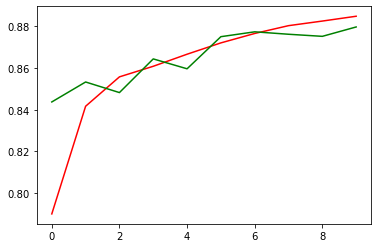

In [9]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

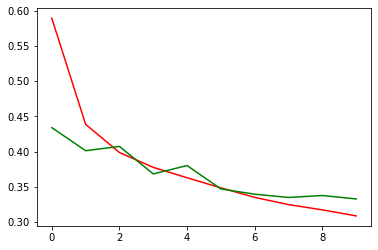

In [10]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [11]:
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


prediction:

 [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
actual    : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [12]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 實物測試 
利用Windows圖形介面，透過拖曳，取得圖片檔，顯示並使用已訓練好模型進行預測，並顯示  

為了可以拖曳圖片後，顯示影像需安裝以下2個套件  

pip install windnd

pip install pillow

In [13]:
# 在CMD下安裝 pip install windnd與pip install pillow
import tkinter as tk
from tkinter.messagebox import showinfo
import windnd
from PIL import Image, ImageTk
from skimage import io
from skimage.transform import resize
import numpy as np

def dragged_files(files):
    #取得檔案路徑(只能取英文路徑)
    msg = '\n'.join((item.decode('gbk') for item in files))
    
    #顯示圖片
    im = Image.open(msg) #只能辨識英文路徑
    img = ImageTk.PhotoImage(im)
    img_lab.config(image=img)
    img_lab.image = img
    img_lab.pack()
    
    #進行預測
    image1 = io.imread(msg, as_gray=True)
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1, 28, 28) #/ 255
    X1 = np.abs(1-X1)
    predictions = model.predict_classes(X1)
    
    #顯示影像與圖片
    print(fashion_mnist_labels[int(predictions)])   
    print(predictions)
    plt.imshow(X1.reshape(28,28))
    plt.show() 
    
    #顯示預測值
    strVar.set(f'該圖片為- {fashion_mnist_labels[int(predictions)]} -')
    
window = tk.Tk()
window.geometry('300x320')
window.title('圖片辨識')

#顯示答案
strVar = tk.StringVar()  #建立可更改Label之變數
strVar.set("  ")
resultLab = tk.Label(window,
                     textvariable = strVar,
                     font = ('Arial', 12),
                     width = 30, height = 2)
resultLab.pack()

#圖檔frame
textImg = tk.StringVar()
textImg.set('請拖曳圖片到此，進行辨識')
img_lab = tk.Label(window,
                    textvariable = textImg,
                    font = ('Arial', 12),
                    width = 300, height = 300)
img_lab.pack()

windnd.hook_dropfiles(window, func=dragged_files)
window.mainloop()

**執行結果**
<img src="https://github.com/Yi-Huei/bin/blob/master/images/DL_Clothes.png?raw=true" style="zoom:60%" />

**結論:準確度為86.61%，並不高，且測試後出錯也不少**

## 完整程式碼

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

ds = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train),(x_test, y_test) = ds

# labels
fashion_mnist_labels = ["T袖/上衣",   # index 0
                        "長褲",       # index 1
                        "套頭衫",     # index 2 
                        "洋裝",       # index 3 
                        "外套",       # index 4
                        "涼鞋",       # index 5
                        "襯衫",       # index 6 
                        "運動鞋",     # index 7 
                        "皮包",       # index 8 
                        "短靴"]       # index 9

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

#模型: Deep Learning
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)
score=model.evaluate(x_test_norm, y_test, verbose=0)
print(score)

predictions = model.predict_classes(x_test_norm)
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])